In [4]:
import numpy as np
import cv2
from IPython.display import Image

import matplotlib.pyplot as plt

LOAD_PATH = "./Image/"

#FILE_NAME, FILE_INDEX = "AQ12651390522069_1.jpg", 212
FILE_NAME, FILE_INDEX = "IMG-7526.jpg", 326
#FILE_NAME, FILE_INDEX = "CQ1386032953_1.jpg", 378

Raw = cv2.imread(LOAD_PATH+FILE_NAME)         # w/o BG, Color

print (Raw.shape)
#print (Raw)

(4032, 3024, 3)


In [12]:
def IMAGE_SView(img,tmp_file="./test.jpg",dp_opt=True,dp=100):
    cv2.imwrite(tmp_file,img)

    dpi = 200 # control parameter
    im_data = plt.imread(tmp_file)
    channel = im_data.shape
    if (dp_opt):
        figsize = channel[0] / float(dpi), channel[1] / float(dpi)
    else:
        figsize = channel[0] / float(dp), channel[1] / float(dp)
        
    fig = plt.figure(figsize=figsize)
    plt.xticks([]), plt.yticks([])
    
    plt.imshow(im_data)
    plt.show()

In [ ]:
img  = Raw.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,127,255,0)
image, contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)

    channel = img.shape
    if (w < channel[0]*0.05):   ## Image, 5%
        roi=img[y:y+h,x:x+w]
        imgwcon = cv2.rectangle(img, (x, y), (x+w+10, y+h), (0,0,0), -1)

IMAGE_SView(imgwcon,tmp_file="blackboxed.png")

2 267 1596 191 21 (1630, 1200, 3) 0.11717791411042945 0.0175 9.095238095238095
17 712 1497 245 23 (1630, 1200, 3) 0.15030674846625766 0.019166666666666665 10.652173913043478
23 71 1449 498 48 (1630, 1200, 3) 0.30552147239263805 0.04 10.375
24 405 1432 92 7 (1630, 1200, 3) 0.05644171779141104 0.005833333333333334 13.142857142857142
27 485 1403 106 8 (1630, 1200, 3) 0.06503067484662577 0.006666666666666667 13.25
31 146 1372 65 7 (1630, 1200, 3) 0.03987730061349693 0.005833333333333334 9.285714285714286
39 81 1290 223 31 (1630, 1200, 3) 0.13680981595092023 0.025833333333333333 7.193548387096774
46 180 1249 58 7 (1630, 1200, 3) 0.03558282208588957 0.005833333333333334 8.285714285714286
49 1038 1247 121 10 (1630, 1200, 3) 0.07423312883435583 0.008333333333333333 12.1
66 365 1138 227 32 (1630, 1200, 3) 0.1392638036809816 0.02666666666666667 7.09375
79 113 1106 241 24 (1630, 1200, 3) 0.14785276073619633 0.02 10.041666666666666
86 802 1056 65 7 (1630, 1200, 3) 0.03987730061349693 0.00583333333

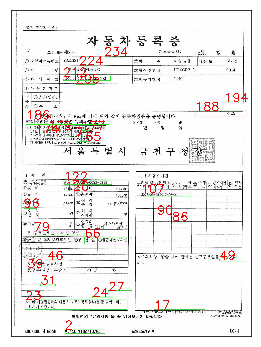

In [4]:
bbimg = cv2.imread("blackboxed.png")
img = Raw.copy()
imgwcon = Raw.copy()

gray = cv2.cvtColor(bbimg,cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray, (5,5))
ret, thresh = cv2.threshold(blur,127,255,0)
image, contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

idx =0 
roi = []
selected_roi = []
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    
    channel = img.shape
    
    if ((w/h > 7) & (w/h<15)):
        roi=img[y:y+h,x:x+w]
        imgwcon = cv2.rectangle(imgwcon, (x, y), (x+w+10, y+h), (0,255,0), 1)
        imgwcon = cv2.putText(imgwcon, str(idx), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 4)
        print (idx,x,y,w,h,channel,w/channel[0],h/channel[1],w/h)

        if (idx == FILE_INDEX):
            selected_roi = roi.copy()
            print ("!!!\t",x,y,w,h,channel,w/channel[0],h/channel[1],w/h)
            cv2.imwrite('Crop.png', roi)
                    
IMAGE_SView(imgwcon,tmp_file="Find_Box.jpg")

In [7]:
from PIL import Image
from pytesseract import *

### FILE_NAME, FILE_INDEX = "AQ12651390522069_1.jpg", 456

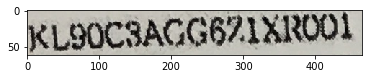

KL90C3AGG‘571XROOI


In [12]:
im = Image.open("./Crop.png")

plt.imshow(im)
plt.show()


text = image_to_string(im,lang="eng") ## TESSERACT

print (text)

### FILE_NAME, FILE_INDEX = "IMG-7526.jpg", 1078

rotated angle -2.3749618530273438


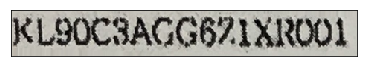

397 	 KL90C3AGGB7JXROOI 	 KL90C3AGGB7JXROOI


In [24]:
idx =0 
for cnt in contours:
    idx += 1
    if (idx == FILE_INDEX):
        x,y,w,h = cv2.boundingRect(cnt)
        roi=img[y:y+h,x:x+w]

High_crop = cv2.resize(roi, None, fx =2.0, fy=2.0, interpolation=cv2.INTER_LINEAR)
gray = cv2.cvtColor(High_crop, cv2.COLOR_BGR2GRAY)

#gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

gray = cv2.bitwise_not(gray) 
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
# https://docs.opencv.org/2.4/doc/tutorials/imgproc/shapedescriptors/bounding_rotated_ellipses/bounding_rotated_ellipses.html

rect=cv2.minAreaRect(coords)
points = cv2.boxPoints(rect)
points = np.int0(np.around(points))

if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle
    
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(roi, M, (w, h),
                         flags=cv2.INTER_CUBIC, 
                         borderMode=cv2.BORDER_REPLICATE)

print ("rotated angle",angle)

IMAGE_SView(rotated,tmp_file="High_crop_rot.png",dp_opt=False,dp = 10)
high_crop_im = Image.open("./High_crop_rot.png")

import re
text = image_to_string(high_crop_im,lang="eng")
text1 = re.sub('[^A-Z,a-z,0-9]+','',text)

print (idx,"\t",text,"\t",text1)
